### I- Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### II- Importation de données

In [2]:
import pandas as pd
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Serial_Number                    215 non-null    int64  
 1   gender                           215 non-null    object 
 2   SecondaryEducation_p             215 non-null    float64
 3   education_board_type             215 non-null    object 
 4   higher_secondary_p               215 non-null    float64
 5   H_education_board_type           215 non-null    object 
 6   higher_secondary_specialization  215 non-null    object 
 7   degree_p                         215 non-null    float64
 8   degree_type                      215 non-null    object 
 9   workExperience                   215 non-null    object 
 10  etest_p                          215 non-null    float64
 11  specialisation                   215 non-null    object 
 12  mba_p                 

### Tester l'existance de valeurs non définies NA/NaN


In [4]:
df.isna().any()

Serial_Number                      False
gender                             False
SecondaryEducation_p               False
education_board_type               False
higher_secondary_p                 False
H_education_board_type             False
higher_secondary_specialization    False
degree_p                           False
degree_type                        False
workExperience                     False
etest_p                            False
specialisation                     False
mba_p                              False
status                             False
dtype: bool

### traitement des valeurs aberrantes 

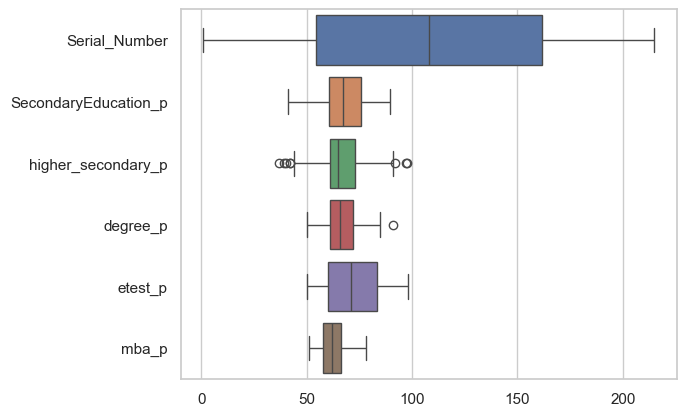

In [5]:
sns.set(style='whitegrid')
ax=sns.boxplot(df,orient='h')

### traitement des valeurs aberrantes de la colonne 'higher_secondary_p'

##### 1. diagramme en moustache (boxplot)

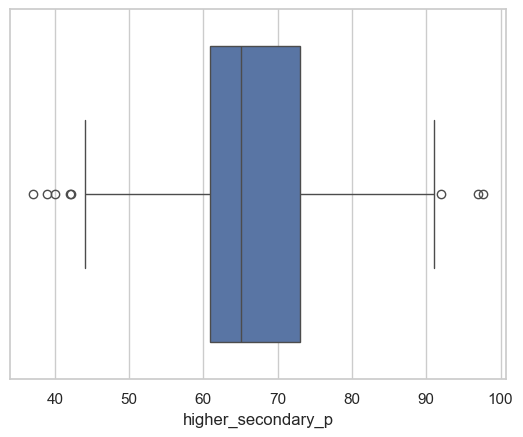

In [6]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['higher_secondary_p'],orient='h')

##### 2 - calculer les 4 quartiles (Q1,Q3,IRQ) et Sup, Inf

In [7]:
Q1=df['higher_secondary_p'].quantile(0.25)
Q3=df['higher_secondary_p'].quantile(0.75)
IQR=Q3-Q1
Inf = df['higher_secondary_p'].quantile(0.25)-1.5*IQR
Sup = df['higher_secondary_p'].quantile(0.75)+1.5*IQR

In [8]:
print(Sup)

91.15


##### 3- déduire le nombre de outliers

In [9]:
df[df['higher_secondary_p']>=Sup].count()

Serial_Number                      3
gender                             3
SecondaryEducation_p               3
education_board_type               3
higher_secondary_p                 3
H_education_board_type             3
higher_secondary_specialization    3
degree_p                           3
degree_type                        3
workExperience                     3
etest_p                            3
specialisation                     3
mba_p                              3
status                             3
dtype: int64

##### 4-remplacer les outliers par la mediane

In [10]:
Q1g = df['higher_secondary_p'].quantile(0.25)
Q3g = df['higher_secondary_p'].quantile(0.75)
IQRg = Q3g - Q1g

Infg = Q1g - 1.5 * IQRg
Supg = Q3g + 1.5 * IQRg

mean_val = df['higher_secondary_p'].mean()

df['higher_secondary_p'] = df['higher_secondary_p'].apply(
    lambda x: mean_val if (x < Infg or x > Supg) else x
)


##### 5- retracer le diagramme en moustache pour les 'higher_secondary_p'

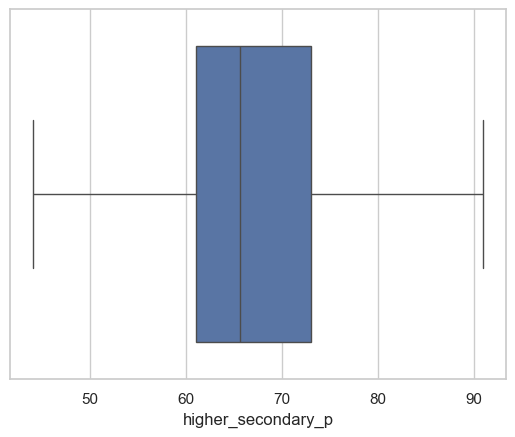

In [11]:
 sns.set(style='whitegrid')
 ax=sns.boxplot(x=df['higher_secondary_p'],orient='h') 

### traitement des valeurs aberrantes de la colonne 'degree_p'

##### 1. diagramme en moustache (boxplot)

sns.set(style='whitegrid')
ax=sns.boxplot(df['degree_p'],orient='h')

##### 2 - calculer les 4 quartiles (Q1,Q3,IRQ) et Sup, Inf

In [12]:
Q1=df['degree_p'].quantile(0.25)
Q3=df['degree_p'].quantile(0.75)
IQR=Q3-Q1
Inf = df['degree_p'].quantile(0.25)-1.5*IQR
Sup = df['degree_p'].quantile(0.75)+1.5*IQR

In [13]:
print(Sup)

88.5


##### 3- déduire le nombre de outliers

In [14]:
df[df['degree_p']>=Sup].count()

Serial_Number                      1
gender                             1
SecondaryEducation_p               1
education_board_type               1
higher_secondary_p                 1
H_education_board_type             1
higher_secondary_specialization    1
degree_p                           1
degree_type                        1
workExperience                     1
etest_p                            1
specialisation                     1
mba_p                              1
status                             1
dtype: int64

##### 4-remplacer les outliers par la mediane

In [15]:
Q1g = df['degree_p'].quantile(0.25)
Q3g = df['degree_p'].quantile(0.75)
IQRg = Q3g - Q1g

Infg = Q1g - 1.5 * IQRg
Supg = Q3g + 1.5 * IQRg

mean_val = df['degree_p'].mean()

df['degree_p'] = df['degree_p'].apply(
    lambda x: mean_val if (x < Infg or x > Supg) else x
)


##### 5- retracer le diagramme en moustache pour les 'degree_p'

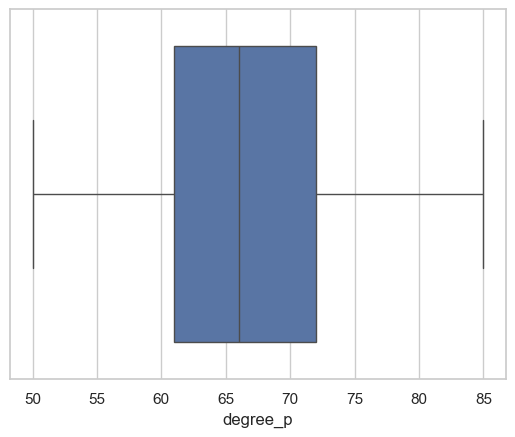

In [16]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['degree_p'],orient='h')

 ### visualisations 

 1- Affichage  la correlation entre les variables du dataframe 

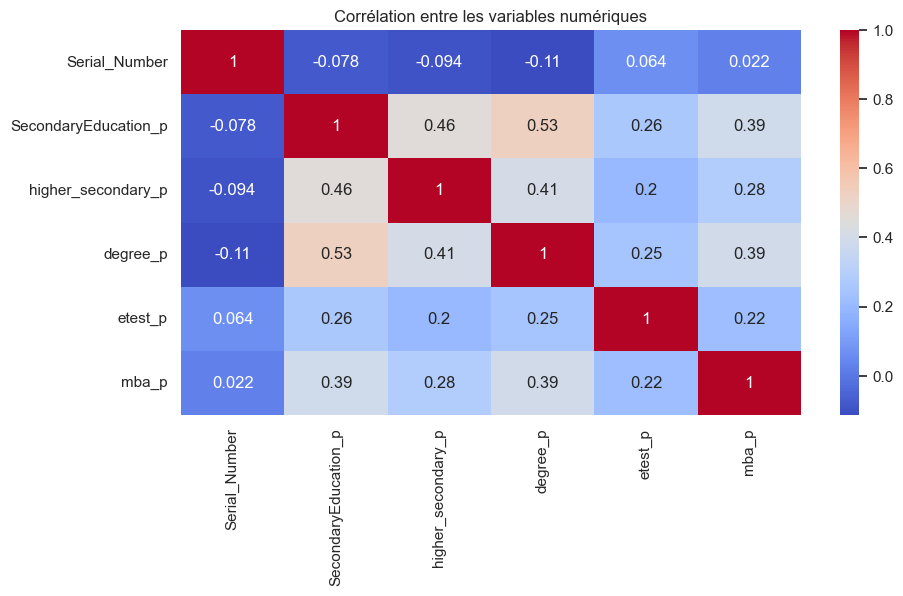

In [17]:
plt.figure(figsize=(10,5))

num_df = df.select_dtypes(include=['int64', 'float64'])

correlation = num_df.corr(method='pearson')

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables numériques")
plt.show()


### traitement des doublons

In [18]:
num_duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {num_duplicates}")

Nombre de lignes dupliquées : 0


### Partage des données

1-affecter à Y (cible) la dernière colonne (status) et le reste du dataframe au entrées X

In [19]:
X = df.iloc[:, :-1]  # 13 premiers colonnes
Y = df.iloc[:, -1].apply(lambda x: 1 if x == "Placed" else 0) # Cible : dernière colonne (status)


2-afficher un echontillion de X et Y

In [20]:
X.head()

,Serial_Number,gender,SecondaryEducation_p,education_board_type,higher_secondary_p,H_education_board_type,higher_secondary_specialization,degree_p,degree_type,workExperience,etest_p,specialisation,mba_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [21]:
Y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

### Transformer X et Y en tableau numpy

In [22]:
X=X.values
Y=Y.values

In [23]:
type(X) #verification

numpy.ndarray

In [24]:
type(Y) #verification

numpy.ndarray

### Catégorisation des variables

Nous commençons par les colonnes catégoriques à deux états 'gender','education_board_type','H_education_board_type','workExperience','specialisation'

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [26]:
X[:,1] = label.fit_transform(X[:,1])
X[:,3] = label.fit_transform(X[:,3]) 
X[:,5] = label.fit_transform(X[:,5])
X[:,9] = label.fit_transform(X[:,9])
X[:,11] = label.fit_transform(X[:,11])

Vérifier cette transformation

In [27]:
X[:10,:]

array([[1, 1, 67.0, 1, 91.0, 1, 'Commerce', 58.0, 'Sci&Tech', 0, 55.0, 1,
        58.8],
       [2, 1, 79.33, 0, 78.33, 1, 'Science', 77.48, 'Sci&Tech', 1, 86.5,
        0, 66.28],
       [3, 1, 65.0, 0, 68.0, 0, 'Arts', 64.0, 'Comm&Mgmt', 0, 75.0, 0,
        57.8],
       [4, 1, 56.0, 0, 52.0, 0, 'Science', 52.0, 'Sci&Tech', 0, 66.0, 1,
        59.43],
       [5, 1, 85.8, 0, 73.6, 0, 'Commerce', 73.3, 'Comm&Mgmt', 0, 96.8,
        0, 55.5],
       [6, 1, 55.0, 1, 49.8, 1, 'Science', 67.25, 'Sci&Tech', 1, 55.0, 0,
        51.58],
       [7, 0, 46.0, 1, 49.2, 1, 'Commerce', 79.0, 'Comm&Mgmt', 0, 74.28,
        0, 53.29],
       [8, 1, 82.0, 0, 64.0, 0, 'Science', 66.0, 'Sci&Tech', 1, 67.0, 0,
        62.14],
       [9, 1, 73.0, 0, 79.0, 0, 'Commerce', 72.0, 'Comm&Mgmt', 0, 91.34,
        0, 61.29],
       [10, 1, 58.0, 0, 70.0, 0, 'Commerce', 61.0, 'Comm&Mgmt', 0, 54.0,
        0, 52.21]], dtype=object)

nous transformons la colonne 'higher_secondary_specialization' qui a 3 etats :'Commerce' , 'Science' , 'Arts'


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [29]:
ct = ColumnTransformer(
    transformers=[
        ('higher_secondary_specialization', OneHotEncoder(), [6])
    ],
    remainder='passthrough'  
)

X = ct.fit_transform(X)


In [30]:
print(X[:10, :])

[[0.0 1.0 0.0 1 1 67.0 1 91.0 1 58.0 'Sci&Tech' 0 55.0 1 58.8]
 [0.0 0.0 1.0 2 1 79.33 0 78.33 1 77.48 'Sci&Tech' 1 86.5 0 66.28]
 [1.0 0.0 0.0 3 1 65.0 0 68.0 0 64.0 'Comm&Mgmt' 0 75.0 0 57.8]
 [0.0 0.0 1.0 4 1 56.0 0 52.0 0 52.0 'Sci&Tech' 0 66.0 1 59.43]
 [0.0 1.0 0.0 5 1 85.8 0 73.6 0 73.3 'Comm&Mgmt' 0 96.8 0 55.5]
 [0.0 0.0 1.0 6 1 55.0 1 49.8 1 67.25 'Sci&Tech' 1 55.0 0 51.58]
 [0.0 1.0 0.0 7 0 46.0 1 49.2 1 79.0 'Comm&Mgmt' 0 74.28 0 53.29]
 [0.0 0.0 1.0 8 1 82.0 0 64.0 0 66.0 'Sci&Tech' 1 67.0 0 62.14]
 [0.0 1.0 0.0 9 1 73.0 0 79.0 0 72.0 'Comm&Mgmt' 0 91.34 0 61.29]
 [0.0 1.0 0.0 10 1 58.0 0 70.0 0 61.0 'Comm&Mgmt' 0 54.0 0 52.21]]


nous transformons la colonne 'degree_type' qui a 3 etats :'Sci&Tech' , 'Comm&Mgmt' , 'Others'

In [31]:
ct = ColumnTransformer(
    transformers=[
        ('degree_type', OneHotEncoder(), [10])  
    ],
    remainder='passthrough'  
)

X = ct.fit_transform(X)




In [32]:
print(X[:10, :])

[[0.0 0.0 1.0 0.0 1.0 0.0 1 1 67.0 1 91.0 1 58.0 0 55.0 1 58.8]
 [0.0 0.0 1.0 0.0 0.0 1.0 2 1 79.33 0 78.33 1 77.48 1 86.5 0 66.28]
 [1.0 0.0 0.0 1.0 0.0 0.0 3 1 65.0 0 68.0 0 64.0 0 75.0 0 57.8]
 [0.0 0.0 1.0 0.0 0.0 1.0 4 1 56.0 0 52.0 0 52.0 0 66.0 1 59.43]
 [1.0 0.0 0.0 0.0 1.0 0.0 5 1 85.8 0 73.6 0 73.3 0 96.8 0 55.5]
 [0.0 0.0 1.0 0.0 0.0 1.0 6 1 55.0 1 49.8 1 67.25 1 55.0 0 51.58]
 [1.0 0.0 0.0 0.0 1.0 0.0 7 0 46.0 1 49.2 1 79.0 0 74.28 0 53.29]
 [0.0 0.0 1.0 0.0 0.0 1.0 8 1 82.0 0 64.0 0 66.0 1 67.0 0 62.14]
 [1.0 0.0 0.0 0.0 1.0 0.0 9 1 73.0 0 79.0 0 72.0 0 91.34 0 61.29]
 [1.0 0.0 0.0 0.0 1.0 0.0 10 1 58.0 0 70.0 0 61.0 0 54.0 0 52.21]]


### Subdivision du dataset en traitement Test

In [33]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,\
                                                random_state=0)

In [34]:
X_train.shape

(172, 17)

In [35]:
X_test.shape

(43, 17)

In [36]:
Y.mean()

np.float64(0.6883720930232559)

In [37]:
print(y_train.mean())
print(y_test.mean())


0.7034883720930233
0.627906976744186


###  Mise à l'echelle des variables

1-standardisation du X_train et X_test

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

2 - Afficher un echantillon du X_train_sc

In [46]:
X_train_sc[0:5,:]

array([[ 0.67648143, -0.23497813, -0.59525684, -0.23497813,  0.92166283,
        -0.82841687, -1.41902199,  0.73192505, -0.41062939, -0.90029235,
        -0.04624505, -1.23669388, -0.06639371,  1.38392711, -0.91848631,
        -0.90029235,  0.05194371],
       [ 0.67648143, -0.23497813, -0.59525684, -0.23497813, -1.08499548,
         1.20712172,  0.48603784, -1.3662601 ,  0.45569151, -0.90029235,
        -1.10400317,  0.80860754,  0.40027642, -0.72258141, -1.24217438,
         1.1107503 ,  0.57709192],
       [ 0.67648143, -0.23497813, -0.59525684,  4.25571511, -1.08499548,
        -0.82841687,  0.27792206, -1.3662601 , -0.07372682, -0.90029235,
         0.01597602, -1.23669388,  0.44145319,  1.38392711,  0.58224933,
        -0.90029235,  1.48972813],
       [-1.47823719, -0.23497813,  1.67994709, -0.23497813, -1.08499548,
         1.20712172, -1.32296855, -1.3662601 ,  0.24392418,  1.1107503 ,
        -0.60623464,  0.80860754,  0.84361303, -0.72258141, -1.24732397,
         1.1107503 

### Modélisation

##### 1. k Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc,y_train)
y_pred_knn = knn.predict(X_test_sc)

#####  Evaluation du modèle KNN


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[ 3 13]
 [ 2 25]]
Accuracy knn 0.6511627906976745


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

In [49]:
from sklearn import metrics
print('Recall knn : ', recall_score(y_test,y_pred_knn))
print('Precision knn : ', precision_score(y_test,y_pred_knn))

Recall knn :  0.9259259259259259
Precision knn :  0.6578947368421053


In [50]:
for i in range(10):
    print(y_test[i],y_pred_knn[i])

0 1
1 0
1 1
0 0
1 1
0 1
1 1
1 1
0 1
1 1


##### 2. GRID SEARCH

In [51]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)


{'n_neighbors': 11}
0.8194957983193276


In [52]:
y_pred_knn_o = grille.predict(X_test_sc)

In [53]:
knn_op_acc=accuracy_score(y_test,y_pred_knn_o)
knn_op_rec=recall_score(y_test,y_pred_knn_o)
knn_op_prec=precision_score(y_test,y_pred_knn_o)
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', knn_op_acc)
print('Recall knn op', knn_op_rec)
print('Precision knn op',knn_op_prec)

Confusion matrix knn op 
 [[ 3 13]
 [ 0 27]]
Accuracy knn op 0.6976744186046512
Recall knn op 1.0
Precision knn op 0.675


##### 3. DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()

In [55]:
dt.fit(X_train_sc,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
y_pred_dt = dt.predict(X_test_sc)

In [57]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

0 0
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
1 1


In [58]:
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_rec=recall_score(y_test,y_pred_dt)
dt_prec=precision_score(y_test,y_pred_dt)
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', dt_acc)
print('Recall dt', dt_rec)
print('Precision dt', dt_prec)

Confusion matrix dt 
 [[ 8  8]
 [ 6 21]]
Accuracy dt 0.6744186046511628
Recall dt 0.7777777777777778
Precision dt 0.7241379310344828


In [59]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        16
           1       0.72      0.78      0.75        27

    accuracy                           0.67        43
   macro avg       0.65      0.64      0.64        43
weighted avg       0.67      0.67      0.67        43



In [60]:
features_final = ['Serial_Number', 'gender', 'SecondaryEducation_p', 'education_board_type', 
                  'higher_secondary_p', 'H_education_board_type', 'higher_secondary_specialization', 
                  'degree_p', 'workExperience', 'etest_p', 'specialisation', 'mba_p', 'status'] 



In [61]:
features_final = [f'feature_{i}' for i in range(X_train_sc.shape[1])]

from sklearn import tree
tree.export_graphviz(dt,
                     feature_names=features_final,
                     out_file='dt.dot',
                     label='all',
                     filled=True,
                     rounded=True)


##### 4. RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [63]:
rf.fit(X_train_sc,y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_pred_rf = rf.predict(X_test_sc)

In [65]:
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_rec=recall_score(y_test,y_pred_rf)
rf_prec=precision_score(y_test,y_pred_rf)
print('Confusion matrix rf \n', confusion_matrix(y_test,y_pred_rf))
print('Accuracy rf', rf_acc)
print('Recall rf', rf_rec)
print('Precision rf', rf_prec)

Confusion matrix rf 
 [[ 7  9]
 [ 5 22]]
Accuracy rf 0.6744186046511628
Recall rf 0.8148148148148148
Precision rf 0.7096774193548387


##### 5. Linéaire SVM

In [66]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [67]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)

In [68]:
svm_acc=accuracy_score(y_test,y_predictSVM_l)
svm_prec=precision_score(y_test,y_predictSVM_l)
svm_rec=recall_score(y_test,y_predictSVM_l)
print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(svm_acc))
print('Precision linear SVM {0:.3f}'.format(svm_prec))
print('Recall linear SVM {0:.3f}'.format(svm_rec))

[[11  5]
 [ 3 24]]
Accuracy linear SVM 0.814
Precision linear SVM 0.828
Recall linear SVM 0.889


In [69]:
print(classification_report(y_test,y_predictSVM_l))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.83      0.89      0.86        27

    accuracy                           0.81        43
   macro avg       0.81      0.79      0.80        43
weighted avg       0.81      0.81      0.81        43



#### 6. Kernel SVM

In [70]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)
y_predictSVM_k = kernel_SVM.predict(X_test_sc)
Ksvm_acc=accuracy_score(y_test,y_predictSVM_k)
Ksvm_rec=precision_score(y_test,y_predictSVM_k)
Ksvm_prec=recall_score(y_test,y_predictSVM_k)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(Ksvm_acc))
print('Precision rbf SVM {0:.3f}'.format(Ksvm_rec))
print('Recall rbf SVM {0:.3f}'.format(Ksvm_prec))

[[ 5 11]
 [ 2 25]]
Accuracy rbf SVM 0.698
Precision rbf SVM 0.694
Recall rbf SVM 0.926


In [71]:
print(classification_report(y_test,y_predictSVM_k))

              precision    recall  f1-score   support

           0       0.71      0.31      0.43        16
           1       0.69      0.93      0.79        27

    accuracy                           0.70        43
   macro avg       0.70      0.62      0.61        43
weighted avg       0.70      0.70      0.66        43



#### 7. Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [73]:
y_predictLR = LR.predict(X_test_sc)
LR_acc=accuracy_score(y_test,y_predictLR)
LR_prec=metrics.precision_score(y_test,y_predictLR)
LR_rec=metrics.recall_score(y_test,y_predictLR)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(LR_acc))
print('Precision Logistic Regression {0:.3f}'.format(LR_prec))
print('Recall Logistic Regression {0:.3f}'.format(LR_rec))

[[11  5]
 [ 3 24]]
Accuracy Logistic Regression 0.814
Precision Logistic Regression 0.828
Recall Logistic Regression 0.889


#### 8. Extra Trees Classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [75]:
et = ExtraTreesClassifier(n_estimators=300, random_state=0)
et.fit(X_train, y_train)

y_pred_et = et.predict(X_test)
acc_et = accuracy_score(y_test, y_pred_et)
et_rec = recall_score(y_test, y_pred_et)
et_prec = precision_score(y_test, y_pred_et)

print("Accuracy ExtraTrees :", acc_et)
print("Recall ExtraTrees :", et_rec)
print("Precision ExtraTrees :", et_prec)


Accuracy ExtraTrees : 0.7209302325581395
Recall ExtraTrees : 0.9259259259259259
Precision ExtraTrees : 0.7142857142857143


#### 9. Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier


In [77]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
rec_gb = recall_score(y_test, y_pred_gb, average='binary')
prec_gb = precision_score(y_test, y_pred_gb, average='binary')
print("Accuracy:", acc_gb)
print("Recall:", rec_gb)
print("Precision:", prec_gb)


Accuracy: 0.7209302325581395
Recall: 0.8518518518518519
Precision: 0.7419354838709677


#### 10. AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier


In [79]:
adb = AdaBoostClassifier(n_estimators=300, random_state=0)
adb.fit(X_train, y_train)
y_pred_adb = adb.predict(X_test)
acc_adb = accuracy_score(y_test, y_pred_adb)
rec_adb = recall_score(y_test, y_pred_adb, average='binary')
prec_adb = precision_score(y_test, y_pred_adb, average='binary')

print("AdaBoost :")
print("Accuracy:", acc_adb)
print("Recall:", rec_adb)
print("Precision:", prec_adb)

AdaBoost :
Accuracy: 0.7441860465116279
Recall: 0.8518518518518519
Precision: 0.7666666666666667


#### 11. LightGBM Classifier

In [80]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 599.9 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 633.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 633.2 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 637.3 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 637.3 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 657.8 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 661.9 kB/s  0:00:02



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb, average='binary')
prec_lgb = precision_score(y_test, y_pred_lgb, average='binary')

[LightGBM] [Info] Number of positive: 121, number of negative: 51
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.703488 -> initscore=0.863965
[LightGBM] [Info] Start training from score 0.863965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [82]:
print("LightGBM :")
print("Accuracy:", acc_lgb)
print("Recall:", rec_lgb)
print("Precision:", prec_lgb)

LightGBM :
Accuracy: 0.7441860465116279
Recall: 0.8518518518518519
Precision: 0.7666666666666667


#### 12. CatBoost Classifier

In [83]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.5 MB 2.4 MB/s eta 0:00:43
   ---------------------------------------- 1.0/102.5 MB 2.0 MB/s eta 0:00:51
    --------------------------------------- 1.6/102.5 MB 2.2 MB/s eta 0:00:47
    --------------------------------------- 2.1/102.5 MB 2.2 MB/s eta 0:00:47
   - -------------------------------------- 2.6/102.5 MB 2.3 MB/s eta 0:00:45
   - -------------------------------------- 2.6/102.5 MB 2.3 MB/s eta 0:00:45
   - -------------------------------------- 3.4/102.5 MB 2.2 MB/s eta 0:00:46
   - -------------------------------------- 3.7/102.5 MB 2.2 MB/s eta 0:00:45
   - -------------------------------------- 4.5/102.5 MB 2.2 MB/s eta 0:00:44
   - -------------------------------------- 4.7/102.5 MB 2.1 MB/s eta 0:00:46
   -- ------------------------------------- 5.2/102.5 MB 2.2 MB/s eta 0:00:44



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=0)
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)
acc_cb = accuracy_score(y_test, y_pred_cb)
rec_cb = recall_score(y_test, y_pred_cb, average='binary')
prec_cb = precision_score(y_test, y_pred_cb, average='binary')

print("Accuracy:", acc_cb)
print("Recall:", rec_cb)
print("Precision:", prec_cb)


Accuracy: 0.6511627906976745
Recall: 0.8148148148148148
Precision: 0.6875


#### 13. Neural Network

In [85]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=0)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
rec_mlp = recall_score(y_test, y_pred_mlp, average='binary')
prec_mlp = precision_score(y_test, y_pred_mlp, average='binary')

print("Accuracy:", acc_mlp)
print("Recall:", rec_mlp)
print("Precision:", prec_mlp)

Accuracy: 0.7674418604651163
Recall: 0.8888888888888888
Precision: 0.7741935483870968


### Summary

In [86]:
print("| Algorithm              | Accuracy     | Recall     | Precision  |")
print("| ---------------------- | ----------- | ---------- | ---------- |")
print("| Optimized kNN          | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(knn_op_acc, knn_op_rec, knn_op_prec))
print("| Decision Tree          | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(dt_acc, dt_rec, dt_prec))
print("| Random Forest          | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(rf_acc, rf_rec, rf_prec))
print("| Linear SVM             | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(svm_acc, svm_rec, svm_prec))
print("| Kernel SVM             | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(Ksvm_acc, Ksvm_rec, Ksvm_prec))
print("| Logistic Regression    | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(LR_acc, LR_rec, LR_prec))
print("| Extra Trees Classifier | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_et, et_rec, et_prec))
print("| Gradient Boosting      | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_gb, rec_gb, prec_gb))
print("| AdaBoost               | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_adb, rec_adb, prec_adb))
print("| LightGBM               | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_lgb, rec_lgb, prec_lgb))
print("| CatBoost               | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_cb, rec_cb, prec_cb))
print("| MLP Neural Network     | {0:.3f}     | {1:.3f}    | {2:.3f}    |".format(acc_mlp, rec_mlp, prec_mlp))


| Algorithm              | Accuracy     | Recall     | Precision  |
| ---------------------- | ----------- | ---------- | ---------- |
| Optimized kNN          | 0.698     | 1.000    | 0.675    |
| Decision Tree          | 0.674     | 0.778    | 0.724    |
| Random Forest          | 0.674     | 0.815    | 0.710    |
| Linear SVM             | 0.814     | 0.889    | 0.828    |
| Kernel SVM             | 0.698     | 0.694    | 0.926    |
| Logistic Regression    | 0.814     | 0.889    | 0.828    |
| Extra Trees Classifier | 0.721     | 0.926    | 0.714    |
| Gradient Boosting      | 0.721     | 0.852    | 0.742    |
| AdaBoost               | 0.744     | 0.852    | 0.767    |
| LightGBM               | 0.744     | 0.852    | 0.767    |
| CatBoost               | 0.651     | 0.815    | 0.688    |
| MLP Neural Network     | 0.767     | 0.889    | 0.774    |


### Enregitrement du modele "Logistic Regression"

In [91]:
from sklearn.linear_model import LogisticRegression
import joblib

# Enregistrer le modèle
joblib.dump(LR, 'logistic_regression_model.pkl')

print("Modèle Logistic Regression enregistré avec succès !")



Modèle Logistic Regression enregistré avec succès !
